In [25]:
# import pacakges
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read processed review data
reviews = pd.read_csv('reviews_processed.csv')

<Axes: xlabel='sentiment', ylabel='Density'>

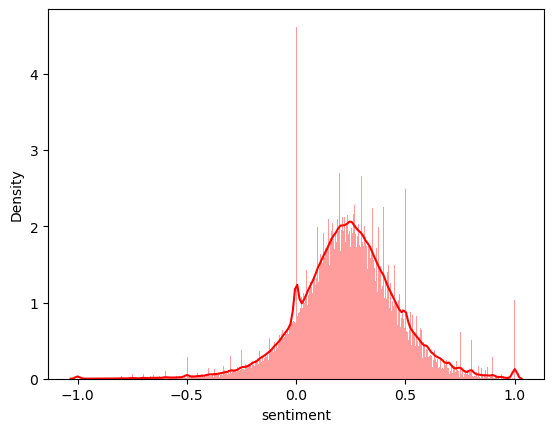

In [13]:
# distribution of sentiment
sns.histplot(reviews['sentiment'][0:] , label = "No", color = 'red', kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

In [16]:
# find Q25 and Q75
reviews.describe()

,Unnamed: 0,stars,sentiment
count,5.261668e+06,5.261668e+06,5.261668e+06
mean,2.630834e+06,3.727739e+00,2.377457e-01
std,1.518913e+06,1.433593e+00,2.291135e-01
min,0.000000e+00,1.000000e+00,-1.000000e+00
25%,1.315417e+06,3.000000e+00,1.030357e-01
50%,2.630834e+06,4.000000e+00,2.395392e-01
75%,3.946250e+06,5.000000e+00,3.750000e-01
max,5.261667e+06,5.000000e+00,1.000000e+00


In [17]:
# drop irrelevent cols
reviews = reviews.drop(columns=['Unnamed: 0','stars'])

In [23]:
# top 25% and lower 25%
text_high = reviews.query('sentiment >= 0.375')
text_low = reviews.query('sentiment >= 0.375')

https://github.com/sidlaurens/wordcloud

In [53]:
# code modified for text analysis
from os import path
import string

class TextAgg:
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just",'so','who','oh']
    
    def __init__(self):
        self.word_list = []
        self.frequency_count = {}

    def process_comments(self, comments_df):
        """
        1. Loops through each comment in the DataFrame.
        2. Cleans each comment by removing punctuation and normalizing it.
        3. Appends each cleaned word to a list.
        """
        for comment in comments_df['text']:
            # Replace specific types of quotation marks with standard double quotes
            extract_string = comment.replace('“','"').replace('”','"')
            # Remove punctuation
            extract_string = extract_string.translate(str.maketrans('', '', string.punctuation))
            # Convert to lowercase and split into words,
            for word in extract_string.lower().split():
                self.word_list.append(word)
        return self.word_list
    
    def fill_dict(self):
        """ 
        1. Adds word to dictionary if it is not numeric or a common word.
        2. Ups the count of a word if it is repeated.
        """
        for word in self.word_list:
            if not word.isalpha():
                continue
            elif word in self.uninteresting_words:
                continue
            elif word in self.frequency_count.keys():
                self.frequency_count[word] += 1
            else:
                self.frequency_count[word] = 1
        return self.frequency_count

In [54]:
# initialize
processor = TextAgg()
processor.process_comments(text_high)
frequency_count = processor.fill_dict()

In [55]:
# Reshape the dictionary into a list of tuples (word, frequency)
word_freq_tuples = [(word, freq) for word, freq in frequency_count.items()]

# Convert the list of tuples into a DataFrame
df = pd.DataFrame(word_freq_tuples, columns=['Word', 'Frequency'])

In [56]:
df.describe()

,Frequency
count,405565.000000
mean,111.237587
std,3824.395768
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,942981.000000


In [58]:
df[df['Word'].str.contains('serve', case=False, na=False)]

,Word,Frequency
265,served,23407
758,server,49499
819,servers,16352
1528,deserve,1682
2097,serveuse,218
...,...,...
401816,serverwhos,1
402160,serversyes,1
402819,servertoserver,1
404000,serverrs,1


In [60]:
df.query('Frequency >= 100000')

,Word,Frequency
3,amazing,251186
9,for,942981
13,out,226509
14,perfect,105467
21,not,268176
23,love,267067
24,there,217881
38,im,105258
46,place,522081
48,great,916071
